In [23]:
try:
    import scapy.all as scapy
except ImportError:
    import scapy

try:
    # This import works from the project directory
    import scapy_http.http
except ImportError:
    # If you installed this package via pip, you just need to execute this
    from scapy.layers import http

read the pcap file

In [24]:
def get_http_payload(ether):
    return ether.payload.payload.payload.payload

def count_char(pcapFile):
    char_set = set()
    with scapy.PcapReader(pcapFile) as pcap_reader:
        for pkt in pcap_reader:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            for c in tmp:
                char_set.add(c)
    print(char_set)
    print('共有字符个数：', len(char_set))
    return(char_set)

In [25]:
pcapFile_weibo = "../data/weibo_req1.pcap"
pcapFile_zhihu = "../data/zhihu_req1.pcap"
pcapFile_tieba = "../data/tieba_req1.pcap"
pcapFile_huafen = "../data/huafen_req1.pcap"
pcapFile_jianshu = "../data/jianshu_req1.pcap"
    
# 统计微博http请求的字符
weibo_set = count_char(pcapFile_weibo)

{'h', 'u', '/', 'H', '-', 'G', 'S', 'P', '.', ' ', '7', ',', 'L', '3', 'B', 'Z', 'V', '*', '?', 'C', '&', 'w', 'J', 'U', ')', 'r', 'a', 'b', 'g', ':', 'A', '!', 't', 'Y', '\n', 'j', ';', 'D', 'i', 'I', '5', '+', '@', '=', 'd', 'Q', 'M', '_', 's', '~', 'v', 'T', '1', 'k', '9', '%', 'p', 'c', '8', 'y', '"', 'N', 'W', 'O', '\r', 'f', 'x', 'K', '6', 'R', 'q', '4', '(', 'e', 'F', 'm', 'l', '0', 'X', 'z', 'o', 'E', 'n', '2'}
共有字符个数： 84


In [26]:
# 统计知乎http请求的字符
zhihu_set = count_char(pcapFile_zhihu)

{'h', 'u', '/', 'G', 'H', '-', 'L', 'P', '.', ' ', '3', 'B', 'K', ',', 'V', 'S', 'Z', '*', '?', 'C', '&', 'w', 'J', 'U', ')', 'r', 'a', 'A', 'g', ':', 'b', 't', 'Y', '\n', 'j', ';', 'D', 'i', 'I', '5', '+', '=', 'd', '2', 'M', '_', 's', 'Q', 'v', 'T', '1', 'k', '9', '%', 'p', 'c', '8', 'y', 'N', 'W', '\r', 'f', 'O', 'x', '6', 'R', 'q', '4', '(', 'e', 'F', 'm', 'l', '0', 'X', 'z', 'o', 'E', 'n', '7'}
共有字符个数： 80


In [27]:
# 统计贴吧http请求的字符
tieba_set = count_char(pcapFile_tieba)

{'h', 'u', '/', 'G', '-', 'H', 'K', '3', '.', ' ', '7', 'P', 'V', 'L', 'B', 'Z', '*', '?', 'C', '&', 'w', 'U', ')', 'r', 'a', 'A', 'g', 'b', ':', 't', 'Y', 'j', '\n', ';', 'D', 'i', 'I', '5', '+', '=', 'd', 'Q', '_', 'M', 's', 'v', 'T', '1', '$', 'k', '9', '%', 'p', 'c', '8', 'y', '"', 'N', 'W', 'f', '\r', 'O', 'x', '6', 'R', 'q', '4', '(', 'e', 'S', 'F', 'm', 'l', '0', 'X', 'z', 'o', 'E', 'n', '2'}
共有字符个数： 80


In [28]:
# 统计简书http请求的字符
jianshu_set = count_char(pcapFile_jianshu)

{'h', 'H', '/', 'K', '-', 'G', 'S', 'P', '3', ' ', '.', 'L', '7', 'V', 'B', 'Z', ',', '*', '?', 'C', '&', 'w', 'J', 'U', ')', 'r', 'u', 'a', 'A', 'g', ':', 'b', 't', 'Y', '\n', 'j', ';', 'D', 'i', 'I', '5', '+', '=', 'd', 'Q', '_', 'M', 's', 'v', 'T', '1', 'k', '9', '%', 'p', 'c', '8', 'y', 'N', 'W', 'O', '\r', 'f', 'x', '6', 'q', 'R', '4', '(', 'e', 'F', 'm', 'l', '0', 'X', 'z', 'o', 'E', 'n', '2'}
共有字符个数： 80


In [29]:
# 统计花粉http请求的字符
huafen_set = count_char(pcapFile_huafen)

{'h', 'u', '/', 'G', '-', 'H', 'L', 'P', '.', ' ', 'V', '3', 'B', 'Z', 'S', '7', ',', '*', '?', 'C', '&', 'w', 'J', 'U', ')', 'r', 'a', 'A', 'g', ':', 'b', 't', 'Y', '\n', 'j', ';', 'D', 'i', 'I', '5', '+', '=', 'd', 'Q', '_', 'M', 's', 'v', 'T', '1', 'k', '9', 'p', 'c', '8', 'y', '"', 'N', 'W', 'f', '\r', 'O', 'x', 'K', 'q', '6', 'R', '4', '(', 'e', 'F', 'm', 'l', '0', 'X', 'z', 'o', 'E', 'n', '2'}
共有字符个数： 80


In [30]:
# 集合所有应用出现的字符
alphabet = weibo_set|zhihu_set|tieba_set|jianshu_set|huafen_set
alphabet = {'c', 'h', 'z', 'd', '1', ']', '?', 'F', '+', '"', '5', 'W', '~', '3', 'n', '9', 'Z', '*', ';', 'w', '(', 'D', 'a', '$', '\r', 'Y', 's', 'G', 'p', 'k', 'b', 'R', '.', 'l', ',', '0', '8', 'X', 'j', 'J', 'K', 'e', 'x', 'P', '[', 'E', 'I', 'C', '/', '4', '_', 'O', 'B', 'm', '6', '{', ' ', 'S', '|', 'f', '&', 'v', ')', 'U', '7', 'N', '2', 'A', 'M', 'r', 't', 'o', 'L', 'y', 'Q', '}', '@', '=', '!', 'V', '-', 'u', 'T', 'g', '%', ':', 'q', '\n', 'i', 'H'}
print(alphabet)
print(len(alphabet))

{'h', '/', 'K', '?', 'J', 'b', 'A', 'g', '!', 'Y', ';', 'i', 'Q', '=', ']', 's', 'v', '$', 'f', 'R', '4', '(', '{', 'F', 'E', 'u', '@', '-', 'L', '.', '7', ')', 'U', 'a', ':', 'D', '+', '[', 'k', '%', 'p', 'y', 'x', 'n', '}', 'H', 'P', 'B', ' ', ',', 'V', '*', 'C', 'w', 'I', '5', 'd', 'T', '"', 'N', 'W', '\r', '6', 'e', 'l', '0', 'X', 'z', 'G', 'S', '3', 'Z', '&', 'r', 't', 'j', '\n', '|', '_', 'M', '~', '1', '9', 'c', '8', 'O', 'q', 'm', 'o', '2'}
90


In [31]:
# one hot encode
char2int = dict((c, i) for (i, c) in enumerate(alphabet))
int2char = dict((i, c) for (i, c) in enumerate(alphabet))

from numpy import argmax

def onehot_encode(data):
    """
        data: 需要编码的字符串
        return： 编码后的矩阵
    """
    integer_encoded = [char2int[char] for char in data] # 获得对data编码的list   
    onehot_encoded = list()
    for value in integer_encoded:
           letter = [0 for _ in range(len(alphabet))]   # 生成一个全0的list
           letter[value] = 1
           onehot_encoded.append(letter)
    return onehot_encoded

In [32]:
print(onehot_encode('abc'))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


In [33]:
# 统计http头部长度
import numpy as np
def count_headerlen(pcapFile):
    header_lens = []
    i = 0
    with scapy.PcapReader(pcapFile) as pcap_reader:
        for pkt in pcap_reader:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
#             if i == 149:
#                 print(tmp)
            header_len = len(tmp)
            header_lens.append(header_len)
            i += 1
    print(max(header_lens))
    print(min(header_lens))
    print(np.mean(header_lens))
    
    return header_lens

In [34]:
a = count_headerlen(pcapFile_weibo)
len(a)

1579
127
362.134


1000

In [35]:
tmp = count_headerlen(pcapFile_zhihu)

644
121
301.755


644
121
301.755


(array([  1.,   0.,   0.,   2.,   0.,  15.,   4.,   0.,   1., 674.,  19.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  56.,
         46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   3.,   7.,   8.,
          3.,  30., 121.,   0.,   0.,   2.]),
 array([121.  , 131.46, 141.92, 152.38, 162.84, 173.3 , 183.76, 194.22,
        204.68, 215.14, 225.6 , 236.06, 246.52, 256.98, 267.44, 277.9 ,
        288.36, 298.82, 309.28, 319.74, 330.2 , 340.66, 351.12, 361.58,
        372.04, 382.5 , 392.96, 403.42, 413.88, 424.34, 434.8 , 445.26,
        455.72, 466.18, 476.64, 487.1 , 497.56, 508.02, 518.48, 528.94,
        539.4 , 549.86, 560.32, 570.78, 581.24, 591.7 , 602.16, 612.62,
        623.08, 633.54, 644.  ]),
 <a list of 50 Patch objects>)

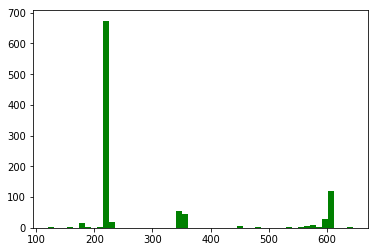

In [36]:
from matplotlib import pyplot as plt

plt.hist(count_headerlen(pcapFile_zhihu),bins=50,color='green')

1579
127
362.134


(array([  4.,   0.,   0.,   2.,  84., 313., 286.,  16.,   2.,   1.,  44.,
         81.,  30.,  83.,  13.,  24.,   0.,   0.,   0.,   0.,   0.,   0.,
          8.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 127.  ,  156.04,  185.08,  214.12,  243.16,  272.2 ,  301.24,
         330.28,  359.32,  388.36,  417.4 ,  446.44,  475.48,  504.52,
         533.56,  562.6 ,  591.64,  620.68,  649.72,  678.76,  707.8 ,
         736.84,  765.88,  794.92,  823.96,  853.  ,  882.04,  911.08,
         940.12,  969.16,  998.2 , 1027.24, 1056.28, 1085.32, 1114.36,
        1143.4 , 1172.44, 1201.48, 1230.52, 1259.56, 1288.6 , 1317.64,
        1346.68, 1375.72, 1404.76, 1433.8 , 1462.84, 1491.88, 1520.92,
        1549.96, 1579.  ]),
 <a list of 50 Patch objects>)

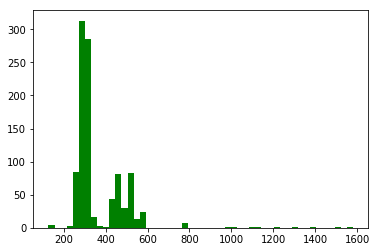

In [37]:
plt.hist(count_headerlen(pcapFile_weibo),bins=50,color='green')

In [38]:
#  with scapy.PcapReader(pcapFile_weibo) as pcap_reader:
#     for pkt in pcap_reader:
#         http_payload = get_http_payload(pkt)
#         http_payload.remove_payload()
#         http_payload.delfieldval('User-Agent')
#         print(http_payload.fields['Host'])
#         tmp = str(bytes(http_payload), encoding='utf-8')
#         print(tmp)
#         break

In [40]:
X_train = np.empty((4500, 230, 85))
with scapy.PcapReader(pcapFile_weibo) as pcap_reader:
    i = 0
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 900:
            break
print(i)

with scapy.PcapReader(pcapFile_zhihu) as pcap_reader:
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 1800:
            break
print(i)

with scapy.PcapReader(pcapFile_tieba) as pcap_reader:
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 2700:
            break
print(i)

with scapy.PcapReader(pcapFile_jianshu) as pcap_reader:
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 3600:
            break
print(i)

with scapy.PcapReader(pcapFile_huafen) as pcap_reader:
    for pkt in pcap_reader:
        http_payload = get_http_payload(pkt)
        http_payload.remove_payload()
        tmp = str(bytes(http_payload), encoding='utf-8')
        # 不足230个字符的以空格填充
        tmp = tmp.ljust(230, ' ')
        # 取前230个字符
        tmp = tmp[:230]
        encoded = onehot_encode(tmp)
        np_encoded = np.array(encoded)
        X_train[i] = np_encoded
        i += 1
        if i == 4500:
            break
print(i)

print(X_train.shape)

# 保存到文件
np.save('X_train.npy', X_train)

1000
2000
3000
4000
5000
(9000, 230, 90)


In [ ]:
X_test = np.empty((500, 230, 85))
with scapy.PcapReader(pcapFile_weibo) as pcap_reader:
    i = 0
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-900] = np_encoded
        i += 1
print(i)

i = 0
with scapy.PcapReader(pcapFile_zhihu) as pcap_reader:
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-800] = np_encoded
        i += 1
print(i)

i = 0
with scapy.PcapReader(pcapFile_tieba) as pcap_reader:
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-700] = np_encoded
        i += 1
print(i)

i = 0
with scapy.PcapReader(pcapFile_jianshu) as pcap_reader:
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-600] = np_encoded
        i += 1
print(i)

i = 0
with scapy.PcapReader(pcapFile_huafen) as pcap_reader:
    for pkt in pcap_reader:
        if i >= 900:
            http_payload = get_http_payload(pkt)
            http_payload.remove_payload()
            tmp = str(bytes(http_payload), encoding='utf-8')
            # 不足230个字符的以空格填充
            tmp = tmp.ljust(230, ' ')
            # 取前230个字符
            tmp = tmp[:230]
            encoded = onehot_encode(tmp)
            np_encoded = np.array(encoded)
            X_test[i-500] = np_encoded
        i += 1
print(i)

print(X_test.shape)

# 保存到文件
np.save('X_test.npy', X_test)

In [ ]:
y_train = np.zeros(4500)
y_train[900:1800] = np.ones(900)
y_train[1800:2700] = np.ones(900) * 2
y_train[2700:3600] = np.ones(900) * 3
y_train[3600:4500] = np.ones(900) * 4
print(len(y_train))
print(y_train[900])
np.save('y_train.npy', y_train)

In [ ]:
y_test = np.zeros(500)
y_test[100:200] = np.ones(100)
y_test[200:300] = np.ones(100) * 2
y_test[300:400] = np.ones(100) * 3
y_test[400:500] = np.ones(100) * 3

print(len(y_test))
print(y_test[100])
np.save('y_test.npy', y_test)

In [ ]:
y_train = np.load('y_train.npy')
print(y_train[900])
print(type(y_train))